# Question 1

In [76]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import AgglomerativeClustering
import csv
from random import seed
from random import randrange
from random import shuffle
import itertools
import operator
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors.kde import KernelDensity
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
from sklearn import mixture

## Part 1

In [316]:
def load_dataset(filename):
    file = open(filename,"r")
    lines = csv.reader(file,delimiter=',')
    dataset = list(lines)
    return dataset

In [317]:
def col_conversion(dataset):
    for row in dataset:
        l1 = len(dataset[0])
        for i in range(0, l1):
            tmp = row[i]
            if tmp.isnumeric():
                row[i] = int(row[i].strip())
            else:                
                try:
                    row[i] = float(row[i]) 
                except:    
                    pass
    return dataset

In [318]:
def normalize(train):
     return  StandardScaler().fit_transform(train)

In [319]:
def split_validation(dataset,split):
    train = list()
    ld = len(dataset)
    train_size = split*ld
    validate_set = list(dataset)
    while True:
        if len(train) >= train_size:
            break
        index = randrange(len(validate_set))
        train.append(validate_set.pop(index))
    return train,validate_set 

In [320]:
def initiate_network(input_neurons,n_hidden_layer,hidden_neurons,output_neurons):
    neural_net =  []
    for i in range(n_hidden_layer):
        if i != 0:
            input_neurons = neural_net[-1].shape[1]
        hidden_layer = np.random.randn(input_neurons,hidden_neurons)
        
        neural_net.append(hidden_layer)
    
    output_layer = np.random.randn(hidden_neurons,output_neurons)
    neural_net.append(output_layer)
        
    return neural_net

In [321]:
def act_sigmoid(x):
    zt = (1/(1+np.exp(-x)))
    return zt

def sigmoid_der(x):
    zt = (x)*(1-(x))
    return zt

In [340]:
def ReLU(x):
    vll = x * (x > 0)
    return vll

def dReLU(x):
    vl1 = 1. * (x > 0)
    return vl1

In [323]:
def forward_prop(neural_net,data):
    row = data
    l1 = len(neural_net)
    out = [[] for i in range(l1)]
    for i in range(0, l1):
        val = np.dot(row,neural_net[i])
        out[i] = act_sigmoid(val)
        row = act_sigmoid(val)
    return out

In [324]:
def back_prop(neural_net,row,output_label,out):
    l1 = len(neural_net)
    delta = [[] for i in range(l1)]
    err = output_label - np.array(out[l1-1])
    delta[l1-1] = np.dot(out[l1-2].T,err)
    for i in reversed(range(1,l1-1)):
        err = np.dot(err,neural_net[i+1].T)*sigmoid_der(out[i])
        delta[i] = np.dot(out[i-1].T,err)
    err = np.dot(err,neural_net[1].T)*sigmoid_der(out[0])
    delta[0] = np.dot(row.T,err)
    return delta

In [325]:
def update_weight(delta,neural_net,data,out,alpha):
    l1 = len(neural_net)
    for i in range(0, l1):
        tmp = alpha*delta[i]
        neural_net[i] += tmp; 
    return neural_net 

In [331]:
def train_neural_net(train,neural_net,iterations,alpha):
    errors = []
    expected = train
    for epoch in range(iterations):
        out = forward_prop(neural_net,train)
        l1 = len(neural_net)
        sum_err = np.mean(np.square(expected-np.array(out[l1-1])))
        delta = back_prop(neural_net,train,expected,out)
        neural_net = update_weight(delta,neural_net,expected,out,alpha)
        
        if epoch%100==0:
#             print('>epoch=%d, lrate=%.5f, error=%.5f' % (epoch,alpha, sum_err))
            errors.append(sum_err)
        
    return neural_net,errors

In [332]:
def batch_train(train,neural_net,iterations,alpha,batch_size):
    data = train    
    neurel_net,err  = train_neural_net(data,neural_net,iterations,alpha)
    return neural_net

In [333]:
def normalize(d):
    v1 = np.min(d, axis=0)
    v2 = np.ptp(d, axis=0)
    d = d - v1
    d = d / v2
    return d

In [334]:
file = "./data.csv"
dataset = load_dataset(file)
del(dataset[0])
dataset = col_conversion(dataset)
for row in dataset:
    del(row[-1])
dataset = np.array(dataset)
dataset = normalize(dataset)
training = dataset

### Autoencoder 1

In [335]:
neural_net = initiate_network(len(training[0]),1,14,len(training[0]))
neural_net  = batch_train(training,neural_net,4000,0.00005,1000)
autoenc1 = np.dot(training,neural_net[0])

>epoch=0, lrate=0.00005, error=0.30314
>epoch=100, lrate=0.00005, error=0.00723
>epoch=200, lrate=0.00005, error=0.00435
>epoch=300, lrate=0.00005, error=0.00343
>epoch=400, lrate=0.00005, error=0.00293
>epoch=500, lrate=0.00005, error=0.00259
>epoch=600, lrate=0.00005, error=0.00235
>epoch=700, lrate=0.00005, error=0.00217
>epoch=800, lrate=0.00005, error=0.00204
>epoch=900, lrate=0.00005, error=0.00194
>epoch=1000, lrate=0.00005, error=0.00186
>epoch=1100, lrate=0.00005, error=0.00179
>epoch=1200, lrate=0.00005, error=0.00173
>epoch=1300, lrate=0.00005, error=0.00168
>epoch=1400, lrate=0.00005, error=0.00164
>epoch=1500, lrate=0.00005, error=0.00160
>epoch=1600, lrate=0.00005, error=0.00156
>epoch=1700, lrate=0.00005, error=0.00153
>epoch=1800, lrate=0.00005, error=0.00150
>epoch=1900, lrate=0.00005, error=0.00148
>epoch=2000, lrate=0.00005, error=0.00145
>epoch=2100, lrate=0.00005, error=0.00143
>epoch=2200, lrate=0.00005, error=0.00140
>epoch=2300, lrate=0.00005, error=0.00138
>epo

### Autoencoder 2

In [260]:
neural_net = initiate_network(len(training[0]),5,14,len(training[0]))
neural_net = batch_train(training,neural_net,4000,0.00005,1000)
autoenc2 = np.dot(training,neural_net[0])

>epoch=0, lrate=0.00005, error=0.33351
>epoch=100, lrate=0.00005, error=0.02251
>epoch=200, lrate=0.00005, error=0.01744
>epoch=300, lrate=0.00005, error=0.01341
>epoch=400, lrate=0.00005, error=0.01429
>epoch=500, lrate=0.00005, error=0.01138
>epoch=600, lrate=0.00005, error=0.01086
>epoch=700, lrate=0.00005, error=0.01167
>epoch=800, lrate=0.00005, error=0.00828
>epoch=900, lrate=0.00005, error=0.00793
>epoch=1000, lrate=0.00005, error=0.00665
>epoch=1100, lrate=0.00005, error=0.00601
>epoch=1200, lrate=0.00005, error=0.00553
>epoch=1300, lrate=0.00005, error=0.00520
>epoch=1400, lrate=0.00005, error=0.00492
>epoch=1500, lrate=0.00005, error=0.00515
>epoch=1600, lrate=0.00005, error=0.00481
>epoch=1700, lrate=0.00005, error=0.00468
>epoch=1800, lrate=0.00005, error=0.00436
>epoch=1900, lrate=0.00005, error=0.00422
>epoch=2000, lrate=0.00005, error=0.00409
>epoch=2100, lrate=0.00005, error=0.00404
>epoch=2200, lrate=0.00005, error=0.00421
>epoch=2300, lrate=0.00005, error=0.00344
>epo

### Autoencoder 3

In [337]:
def forward_prop(neural_net,data):
    row = data
    l1 = len(neural_net)
    out = [[] for i in range(l1)]
    for i in range(0, l1):
        val = np.dot(row,neural_net[i])
        out[i] = ReLU(val)
        row = ReLU(val)
    return out

In [338]:
def back_prop(neural_net,row,output_label,out):
    l1 = len(neural_net)
    delta = [[] for i in range(l1)]
    err = output_label - np.array(out[l1-1])
    delta[l1-1] = np.dot(out[l1-2].T,err)
    for i in reversed(range(1,l1-1)):
        err = np.dot(err,neural_net[i+1].T)*dReLU(out[i])
        delta[i] = np.dot(out[i-1].T,err)
    err = np.dot(err,neural_net[1].T)*dReLU(out[0])
    delta[0] = np.dot(row.T,err)
    return delta

In [341]:
neural_net = initiate_network(len(training[0]),1,14,len(training[0]))
neural_net  = batch_train(training,neural_net,4000,0.000001,1000)
autoenc3 = np.dot(training,neural_net[0])

>epoch=0, lrate=0.00000, error=15.61792
>epoch=100, lrate=0.00000, error=0.13986
>epoch=200, lrate=0.00000, error=0.12767
>epoch=300, lrate=0.00000, error=0.11309
>epoch=400, lrate=0.00000, error=0.10143
>epoch=500, lrate=0.00000, error=0.09290
>epoch=600, lrate=0.00000, error=0.08673
>epoch=700, lrate=0.00000, error=0.08240
>epoch=800, lrate=0.00000, error=0.07938
>epoch=900, lrate=0.00000, error=0.07719
>epoch=1000, lrate=0.00000, error=0.07557
>epoch=1100, lrate=0.00000, error=0.07426
>epoch=1200, lrate=0.00000, error=0.07275
>epoch=1300, lrate=0.00000, error=0.06986
>epoch=1400, lrate=0.00000, error=0.06524
>epoch=1500, lrate=0.00000, error=0.05960
>epoch=1600, lrate=0.00000, error=0.05073
>epoch=1700, lrate=0.00000, error=0.04096
>epoch=1800, lrate=0.00000, error=0.03310
>epoch=1900, lrate=0.00000, error=0.02806
>epoch=2000, lrate=0.00000, error=0.02525
>epoch=2100, lrate=0.00000, error=0.02376
>epoch=2200, lrate=0.00000, error=0.02293
>epoch=2300, lrate=0.00000, error=0.02240
>ep

## Part 2

In [265]:
df = pd.read_csv('data.csv')
df = df.values
anomaly_y = df[:,-1]
Y = anomaly_y

In [271]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    c1 = np.amax(contingency_matrix, axis=0)
    return np.sum(c1) / np.sum(contingency_matrix)

def kmeans(Xfinal, k = 5, max_iter = 10):
    centroids = {}
    for i in range(k):
        centroids[i] = Xfinal[i][:-1]
    o_cls = {}
    for i in range(max_iter):
        n_classifications = {}
        for i in range(k):
            n_classifications[i] = []
        
        for row in Xfinal:
            dist = [np.linalg.norm(row[:-1] - centroids[i]) for i in centroids]
            _class = dist.index(min(dist))
            n_classifications[_class].append(row)
        
        prev = dict(centroids)
        
        for cls in n_classifications:
            tt = n_classifications[cls]
            tt = np.asarray(tt)
            centroids[cls] = np.average(tt[:, :-1], axis=0)
        o_cls = n_classifications
        
    return centroids, o_cls

def predict_kmeans(centroids, row):
    dist = [np.linalg.norm(row - centroids[i]) for i in centroids]
    classification = dist.index(min(dist))
    return classification

def kmeansClustering(X_train, X_test, Y_train, Y_test):
    dataset = np.column_stack([X_train, Y_train])
    test = np.column_stack([X_test, Y_test])
    dataset[:, :-1] = dataset[:, :-1].astype(float)
    centroids, classifications = kmeans(dataset)
    
    Y_pred = []

    correct = 0

    for i in range(len(X_test)):
        cls = predict_kmeans(centroids, X_test[i])
        outcomes = [tmp[-1] for tmp in classifications[cls]]
        tt = max(set(outcomes), key=outcomes.count)
        Y_pred.append(tt)
        if tt == Y_test[i]:
            correct += 1
    
    
    score = purity_score(Y_test, Y_pred)
    
    print("Purity of Clusters using K Means")
    print(score)
    
print("For Auto Encoder 1: ")
X = autoenc1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,shuffle=True)
kmeansClustering(X_train, X_test, Y_train, Y_test)

print("For Auto Encoder 2: ")
X = autoenc2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,shuffle=True)
kmeansClustering(X_train, X_test, Y_train, Y_test)

print("For Auto Encoder 3: ")
X = autoenc3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,shuffle=True)
kmeansClustering(X_train, X_test, Y_train, Y_test)

For Auto Encoder 1: 
Purity of Clusters using K Means
0.83376
For Auto Encoder 2: 
Purity of Clusters using K Means
0.84912
For Auto Encoder 3: 
Purity of Clusters using K Means
0.83568


## Part 3

In [272]:
def GMM(X_train, X_test, Y_train, Y_test):
    gmm = GaussianMixture(n_components = 5)

    gmm.fit(X_train)

    Y_pred = gmm.predict(X_test)
    score = purity_score(Y_test, Y_pred)
    
    print("Purity of clusters using GMM: ")
    print(score)

In [273]:
print("For Auto Encoder 1: ")
X = autoenc1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,shuffle=True)
GMM(X_train, X_test, Y_train, Y_test)

print("For Auto Encoder 2: ")
X = autoenc2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,shuffle=True)
GMM(X_train, X_test, Y_train, Y_test)

print("For Auto Encoder 3: ")
X = autoenc3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,shuffle=True)
GMM(X_train, X_test, Y_train, Y_test)

For Auto Encoder 1: 
Purity of clusters using GMM: 
0.82016
For Auto Encoder 2: 
Purity of clusters using GMM: 
0.83744
For Auto Encoder 3: 
Purity of clusters using GMM: 
0.84288


## Part 4

In [274]:
def HierarchicalClustering(dataset, labeled_arr):
    purity = []
    H_Model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
    out = H_Model.fit_predict(dataset)
    unique_out = set(out)
    for outs in unique_out:
        check_arr = []
        for j in range(len(dataset)):
            if out[j] == outs:
                check_arr.append(labeled_arr[j])
        unique_arr = set(check_arr)
        max_count = 0
        for label in unique_arr:
            max_count = max(max_count, check_arr.count(label))
        purity.append(float(max_count)/float(len(check_arr)))
    print(purity)

In [276]:
print("For Auto Encoder 1: ")
X = autoenc1
HierarchicalClustering(X, Y)

print("For Auto Encoder 2: ")
X = autoenc2
HierarchicalClustering(X, Y)

print("For Auto Encoder 3: ")
X = autoenc3
HierarchicalClustering(X, Y)

For Auto Encoder 1: 
[0.5345552042898876, 1.0, 1.0, 1.0, 1.0]
For Auto Encoder 2: 
[0.534892100732674, 1.0, 1.0, 1.0, 1.0]
For Auto Encoder 3: 
[0.5346938775510204, 1.0, 1.0, 1.0, 1.0]


# Question 2

In [26]:
digits = load_digits()
y_digs = digits.target
X_digs = digits.data

In [27]:
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    X_cov = np.cov(X_std.T)

    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(X_digs)

## For first random number

### KDE

In [28]:
n1 = np.random.randint(15, 41)
y1 = np.array(y_digs)
pca_data1 = PCA(n_components=n1)
Xd1 = np.array(X_std)
pcd = pca_data1.fit(Xd1).transform(X_std1)
print(pcd.shape)

(1797, 36)


In [31]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 500, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 500, 1000]}]
bds = 10 * np.linspace(-1 , 1, 20)
clf = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bds}, cv=5)
clf.fit(pcd, y1)
bdwidth = clf.best_params_['bandwidth']

print("Bandwidth : ",bdwidth)
kde = KernelDensity(kernel='gaussian', bandwidth=bdwidth)
kde.fit(pcd)
print(kde)

Bandwidth :  0.5263157894736836
KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### GMM

In [33]:
n_comps = np.arange(1, 21)
clf_gauss_models = [GaussianMixture(n_components=n, covariance_type='full').fit(pcd) for n in n_comps]
bics = [m.bic(pcd) for m in clf_gauss_models]
lbd = bics.index(min(bics))
print("Optimal Number of Components for GMM =", n_comps[lbd])

Optimal Number of Components for GMM = 6


### Data Generation Using Gaussian Density Estimator

In [37]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

In [34]:
pca1 = PCA(n_components=n1, whiten=True)
dt = pca1.fit_transform(digits.data)
# print(dt.shape)

In [35]:
kde_model = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde_model.fit(dt)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

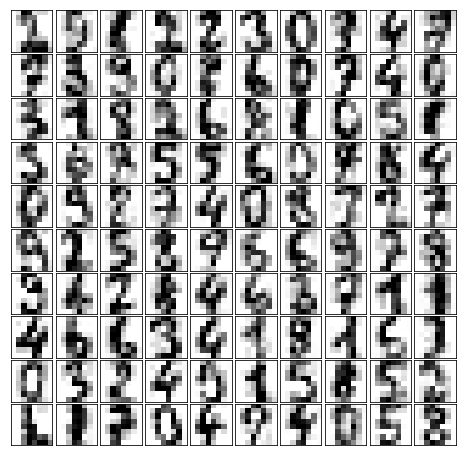

In [38]:
d1new = kde_model.sample(n_samples=100, random_state=0)
digits1k_new = pca1.inverse_transform(d1new)
plot_digits(digits1k_new)

In [40]:
n_comps = np.arange(50, 210, 10)
clf_gauss_models = [GaussianMixture(n_components=n, covariance_type='full', random_state=0) for n in n_comps]
aics = [model.fit(dt).aic(dt) for model in clf_gauss_models]
lbd = aics.index(min(aics))
print("Optimal Number of Components for GMM =", n_comps[lbd])

Optimal Number of Components for GMM = 170


In [44]:
gmm_model = GaussianMixture(n_comps[lbd], covariance_type='full', random_state=0)
gmm_model.fit(dt)
X1_new, y1_new = gmm_model.sample(100)

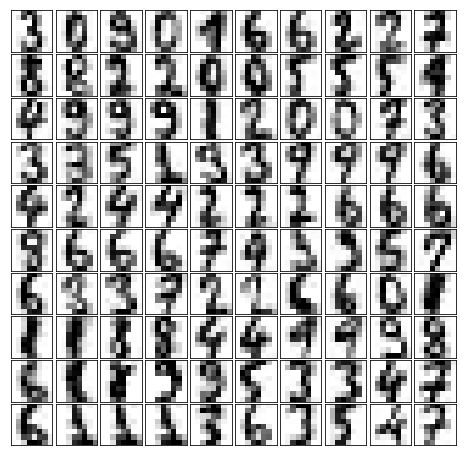

In [45]:
digits2_new = pca1.inverse_transform(X1_new)
plot_digits(digits2_new)

## Second Random Number between 15 and 41

### KDE

In [49]:
n1 = np.random.randint(15, 41)
y1 = np.array(y_digs)
pca_data1 = PCA(n_components=n1)
Xd1 = np.array(X_std)
pcd = pca_data1.fit(Xd1).transform(X_std1)
print(pcd.shape)

(1797, 26)


In [50]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 500, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 500, 1000]}]
bds = 10 * np.linspace(-1 , 1, 20)
clf = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bds}, cv=5)
clf.fit(pcd, y1)
bdwidth = clf.best_params_['bandwidth']

print("Bandwidth : ",bdwidth)
kde = KernelDensity(kernel='gaussian', bandwidth=bdwidth)
kde.fit(pcd)
print(kde)

Bandwidth :  0.5263157894736836
KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### GMM

In [51]:
n_comps = np.arange(1, 21)
clf_gauss_models = [GaussianMixture(n_components=n, covariance_type='full').fit(pcd) for n in n_comps]
bics = [m.bic(pcd) for m in clf_gauss_models]
lbd = bics.index(min(bics))
print("Optimal Number of Components for GMM =", n_comps[lbd])

Optimal Number of Components for GMM = 10


### Data Generation Using Gaussian Density Estimator

In [62]:
pca1 = PCA(n_components=n1, whiten=True)
dt = pca1.fit_transform(digits.data)
# print(dt.shape)

In [63]:
kde_model = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde_model.fit(dt)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

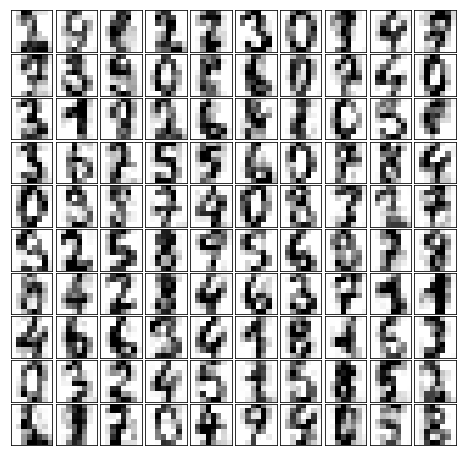

In [64]:
d1new = kde_model.sample(n_samples=100, random_state=0)
digits1k_new = pca1.inverse_transform(d1new)
plot_digits(digits1k_new)

In [65]:
n_comps = np.arange(50, 210, 10)
clf_gauss_models = [GaussianMixture(n_components=n, covariance_type='full', random_state=0) for n in n_comps]
aics = [model.fit(dt).aic(dt) for model in clf_gauss_models]
lbd = aics.index(min(aics))
print("Optimal Number of Components for GMM =", n_comps[lbd])

Optimal Number of Components for GMM = 200


In [57]:
gmm_model = GaussianMixture(n_comps[lbd], covariance_type='full', random_state=0)
gmm_model.fit(dt)
X1_new, y1_new = gmm_model.sample(100)

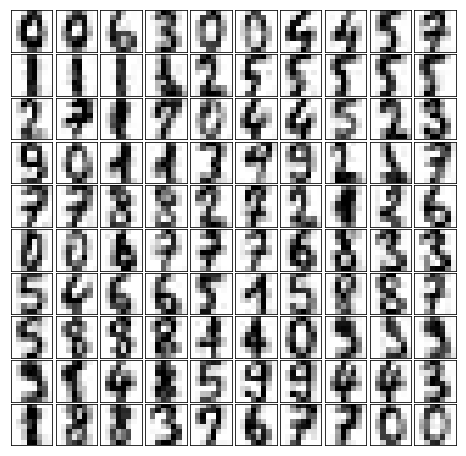

In [58]:
digits2_new = pca1.inverse_transform(X1_new)
plot_digits(digits2_new)

## Third Random Number between 15 and 41

### KDE

In [59]:
n1 = np.random.randint(15, 41)
y1 = np.array(y_digs)
pca_data1 = PCA(n_components=n1)
Xd1 = np.array(X_std)
pcd = pca_data1.fit(Xd1).transform(X_std1)
print(pcd.shape)

(1797, 33)


In [60]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 500, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 500, 1000]}]
bds = 10 * np.linspace(-1 , 1, 20)
clf = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bds}, cv=5)
clf.fit(pcd, y1)
bdwidth = clf.best_params_['bandwidth']

print("Bandwidth : ",bdwidth)
kde = KernelDensity(kernel='gaussian', bandwidth=bdwidth)
kde.fit(pcd)
print(kde)

Bandwidth :  0.5263157894736836
KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### GMM

In [61]:
n_comps = np.arange(1, 21)
clf_gauss_models = [GaussianMixture(n_components=n, covariance_type='full').fit(pcd) for n in n_comps]
bics = [m.bic(pcd) for m in clf_gauss_models]
lbd = bics.index(min(bics))
print("Optimal Number of Components for GMM =", n_comps[lbd])

Optimal Number of Components for GMM = 7


### Data Generation Using Gaussian Density Estimator

In [66]:
pca1 = PCA(n_components=n1, whiten=True)
dt = pca1.fit_transform(digits.data)
# print(dt.shape)

In [67]:
kde_model = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde_model.fit(dt)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

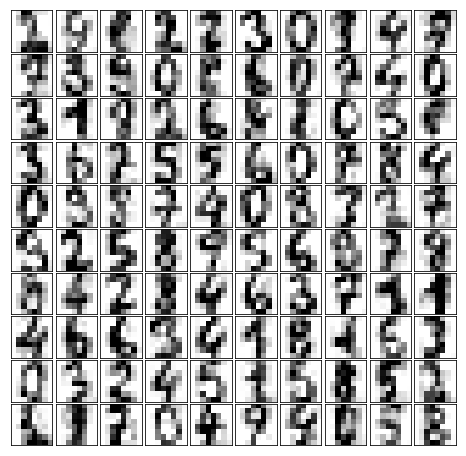

In [68]:
d1new = kde_model.sample(n_samples=100, random_state=0)
digits1k_new = pca1.inverse_transform(d1new)
plot_digits(digits1k_new)

In [69]:
n_comps = np.arange(50, 210, 10)
clf_gauss_models = [GaussianMixture(n_components=n, covariance_type='full', random_state=0) for n in n_comps]
aics = [model.fit(dt).aic(dt) for model in clf_gauss_models]
lbd = aics.index(min(aics))
print("Optimal Number of Components for GMM =", n_comps[lbd])

Optimal Number of Components for GMM = 200


In [70]:
gmm_model = GaussianMixture(n_comps[lbd], covariance_type='full', random_state=0)
gmm_model.fit(dt)
X1_new, y1_new = gmm_model.sample(100)

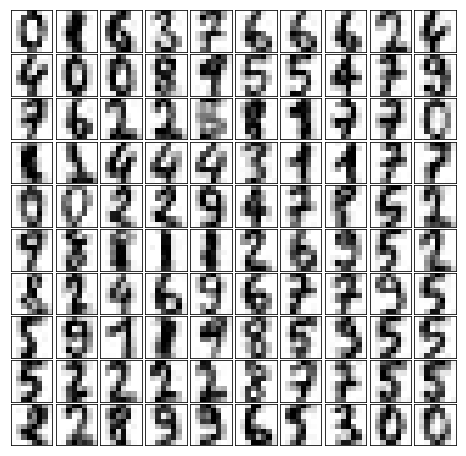

In [71]:
digits2_new = pca1.inverse_transform(X1_new)
plot_digits(digits2_new)

In this part, while sampling 48 nearby points, the was an out of bound and IndexError. So, I sampled 100 points, and if we want the nearest 48 points, we can just take the initial 48 samples so that we get the nearest 48 samples.

Other than that, I have completely used the in-built functions for all my calculations and model building. I browsed through the internet and used all the library functions that are used for the given operations.